In [112]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [16]:
dataset = pd.read_csv("spam.csv", sep= ",", encoding = "latin", header=None)
dataset

,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5569,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5570,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5571,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [22]:
# drop last 3 cols
newdataset = dataset.drop(dataset.columns[[2,3]],axis=1)
newdataset

,0,1
0,v1,v2
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [25]:
#Dropping first row and renaming index
newdataset = newdataset.iloc[1: , :]
newdataset.columns=["label","message"]
newdataset

,label,message
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
6,spam,FreeMsg Hey there darling it's been 3 week's n...
7,ham,Even my brother is not like to speak with me. ...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ì_ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [31]:
#Exploratory Data Analysis (EDA)
newdataset.describe()
newdataset.groupby('label').describe()


message                                                               
        count unique                                                top freq
label                                                                       
ham      4823   4514                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [32]:
#Label-Encoding of target features
# convert label to a numerical variable
newdataset['label_num'] = newdataset.label.map({'ham':0, 'spam':1})
newdataset.head()

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/1052214227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['label_num'] = newdataset.label.map({'ham':0, 'spam':1})


,label,message,label_num
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
4,ham,U dun say so early hor... U c already then say...,0
5,ham,"Nah I don't think he goes to usf, he lives aro...",0
6,spam,FreeMsg Hey there darling it's been 3 week's n...,1
7,ham,Even my brother is not like to speak with me. ...,0


In [35]:
#Lets see our message column
newdataset['message_len'] = newdataset.message.apply(len)
newdataset.head()



/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/2755259051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['message_len'] = newdataset.message.apply(len)


,label,message,label_num,message_len
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
4,ham,U dun say so early hor... U c already then say...,0,49
5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
7,ham,Even my brother is not like to speak with me. ...,0,77


Text(0, 0.5, 'Number of Data points')

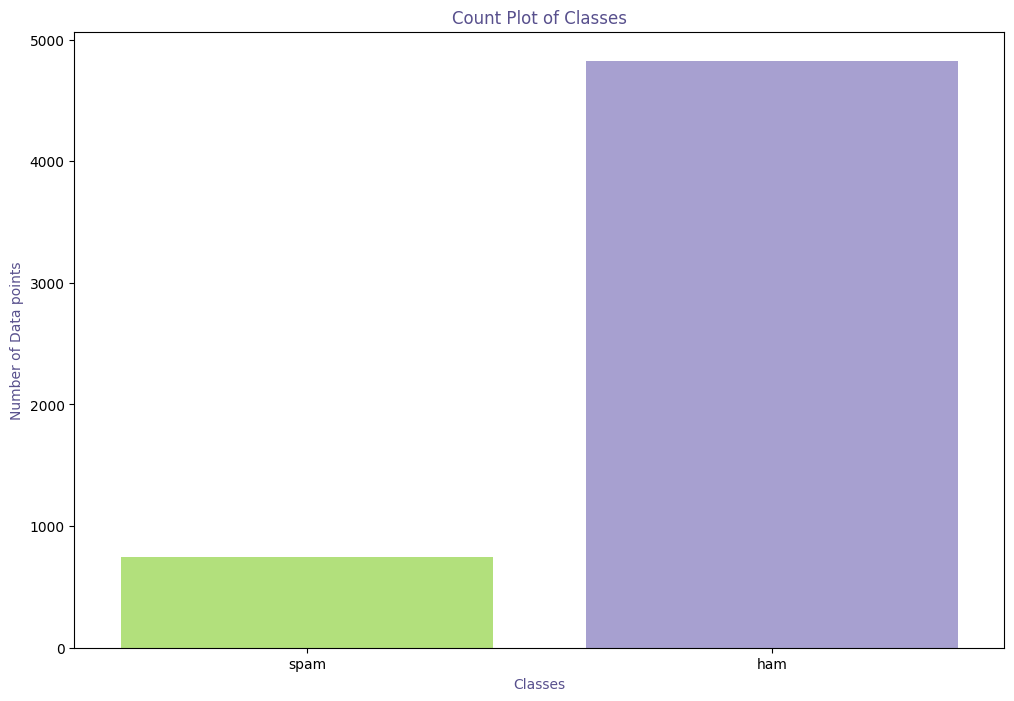

In [48]:
#Palette
cols= ["#B3F16B", "#A198D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= newdataset["label"], palette= cols)
fg.set_title("Distribution of target", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")


Text(0.5, 0, 'Message Length')

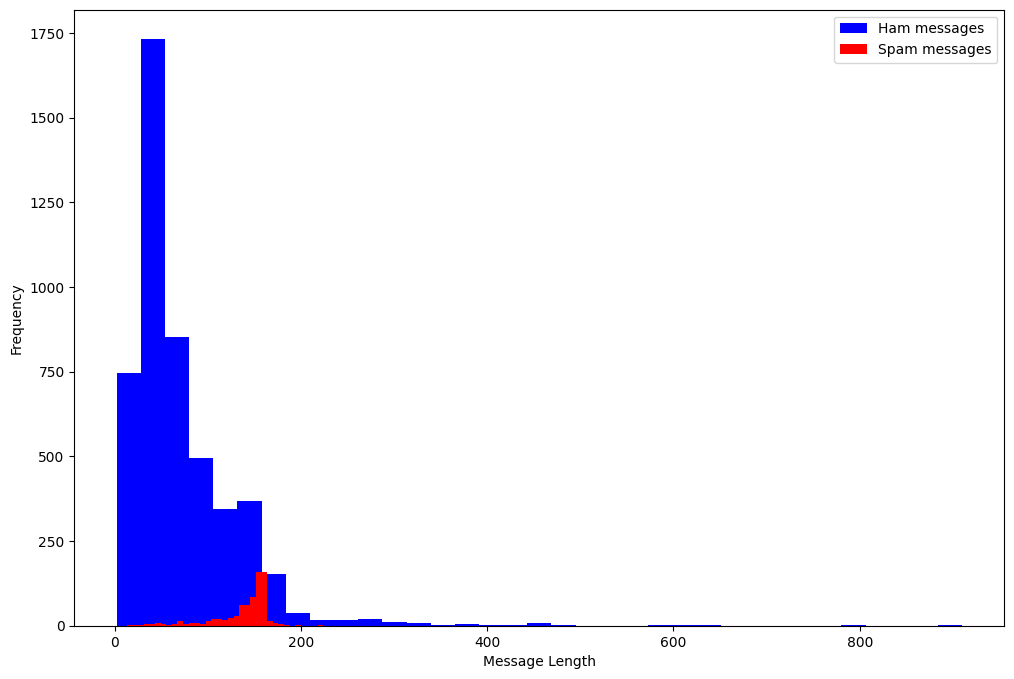

In [52]:
#Lets check the length of spam vs ham messages
plt.figure(figsize=(12, 8))

newdataset[newdataset.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages')
newdataset[newdataset.label=='spam'].message_len.plot(bins=35, kind='hist', color='red', 
                                       label='Spam messages')
plt.legend()
plt.xlabel("Message Length")


Thus we see for this dataset spam messages are are longer while non spam messages are shorter.

In [55]:
#TextProcessing
newdataset["message"][3]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [76]:
def processText(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

newdataset["cleaned_message"] = newdataset["message"].apply(processText)
newdataset["cleaned_message"]


/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/3277694036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["cleaned_message"] = newdataset["message"].apply(processText)


3       free entry in a wkly comp to win fa cup final ...
4             u dun say so early hor u c already then say
5       nah i don t think he goes to usf he lives arou...
6       freemsg hey there darling it s been week s now...
7       even my brother is not like to speak with me t...
                              ...                        
5568    this is the nd time we have tried contact u u ...
5569                    will b going to esplanade fr home
5570    pity was in mood for that so any other suggest...
5571    the guy did some bitching but i acted like i d...
5572                            rofl its true to its name
Name: cleaned_message, Length: 5570, dtype: object

In [82]:
newdataset["Tokenize_Text"]=newdataset.apply(lambda row: nltk.word_tokenize(row["cleaned_message"]), axis=1)
newdataset["Tokenize_Text"][4]

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/1548051492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["Tokenize_Text"]=newdataset.apply(lambda row: nltk.word_tokenize(row["cleaned_message"]), axis=1)


['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']

In [83]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhanand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [84]:
# Removing the stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

newdataset["Nostopword_Text"] = newdataset["Tokenize_Text"].apply(remove_stopwords)

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/3126209909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["Nostopword_Text"] = newdataset["Tokenize_Text"].apply(remove_stopwords)


In [85]:
newdataset

,label,message,label_num,message_len,cleaned_message,Tokenize_Text,Nostopword_Text
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
4,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
6,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we...","[freemsg, hey, darling, week, word, back, like..."
7,ham,Even my brother is not like to speak with me. ...,0,77,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
...,...,...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,1,161,this is the nd time we have tried contact u u ...,"[this, is, the, nd, time, we, have, tried, con...","[nd, time, tried, contact, u, u, pound, prize,..."
5569,ham,Will Ì_ b going to esplanade fr home?,0,37,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5570,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]"
5571,ham,The guy did some bitching but I acted like i'd...,0,125,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin..."


In [98]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saurabhanand/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saurabhanand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/saurabhanand/nltk_data...


True

In [99]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

newdataset["Lemmatized_Text"] = newdataset["Nostopword_Text"].apply(lemmatize_word)

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_12587/3358896796.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["Lemmatized_Text"] = newdataset["Nostopword_Text"].apply(lemmatize_word)


In [100]:
newdataset

,label,message,label_num,message_len,cleaned_message,Tokenize_Text,Nostopword_Text,Lemmatized_Text
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
4,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"
6,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we...","[freemsg, hey, darling, week, word, back, like...","[freemsg, hey, darling, week, word, back, like..."
7,ham,Even my brother is not like to speak with me. ...,0,77,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
...,...,...,...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,1,161,this is the nd time we have tried contact u u ...,"[this, is, the, nd, time, we, have, tried, con...","[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, try, contact, u, u, pound, prize, c..."
5569,ham,Will Ì_ b going to esplanade fr home?,0,37,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]","[b, go, esplanade, fr, home]"
5570,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]","[pity, mood, suggestions]"
5571,ham,The guy did some bitching but I acted like i'd...,0,125,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, somethi..."


In [101]:
corpus= []
for i in newdataset["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
#corpus[:5]

['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent']

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [131]:
#Changing text data in to numbers. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
# # x1 = pd.DataFrame(corpus, columns = tfidf.get_feature_names())
# X = tfidf.fit_transform(corpus).toarray()
# #X
# r = np.where(X==1)
# r[0]


In [132]:
newdataset

,label,message,label_num,message_len,cleaned_message,Tokenize_Text,Nostopword_Text,Lemmatized_Text
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
4,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
5,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"
6,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148,freemsg hey there darling it s been week s now...,"[freemsg, hey, there, darling, it, s, been, we...","[freemsg, hey, darling, week, word, back, like...","[freemsg, hey, darling, week, word, back, like..."
7,ham,Even my brother is not like to speak with me. ...,0,77,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
...,...,...,...,...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,1,161,this is the nd time we have tried contact u u ...,"[this, is, the, nd, time, we, have, tried, con...","[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, try, contact, u, u, pound, prize, c..."
5569,ham,Will Ì_ b going to esplanade fr home?,0,37,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]","[b, going, esplanade, fr, home]","[b, go, esplanade, fr, home]"
5570,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity was in mood for that so any other suggest...,"[pity, was, in, mood, for, that, so, any, othe...","[pity, mood, suggestions]","[pity, mood, suggestions]"
5571,ham,The guy did some bitching but I acted like i'd...,0,125,the guy did some bitching but i acted like i d...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, somethi..."


In [133]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = newdataset['label_num'] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)

In [135]:
y_pred=classifier.predict(X_test)

In [137]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [138]:
accuracy_score(y_test,y_pred)

0.9784560143626571

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       959
           1       1.00      0.85      0.92       155

    accuracy                           0.98      1114
   macro avg       0.99      0.92      0.95      1114
weighted avg       0.98      0.98      0.98      1114

